In [1]:
import numpy as np
import pandas as pd
import sys
from hazm import *
# from stopwords_guilannlp import *
from nltk.tokenize import RegexpTokenizer
from string import punctuation
import re
from collections import Counter
import math
# import xlrd
import nltk
import math
import matplotlib.pyplot as plt

In [2]:
normalizer = Normalizer()
lemmatizer = Lemmatizer()
stemmer = Stemmer()

In [3]:
def load_datatset():
    dataset=pd.read_csv("dataset/ProjectData.csv")
    dataset=dataset[['comment','label']]
    dataset=dataset[dataset['label'] != -2]
    dataset=dataset.dropna()
    return dataset

In [4]:
def undersampl_data(dataset):
    counts = dataset['label'].value_counts()
    min_count = counts.min()
    undersampled_df = pd.concat([
        dataset[dataset['label'] == Label].sample(n=min_count)
        for Label in counts.index
    ])
    return undersampled_df

In [7]:
dataset=load_datatset()
dataset['label'] += 2

In [154]:
dataset=undersampl_data(dataset)

In [8]:
counts = dataset ['label'].value_counts()

In [9]:
counts

3.0    40149
1.0    17044
2.0     5627
Name: label, dtype: int64

In [10]:
dataset

,comment,label
0,گردن بند خوبو قشنگیه خوبم جلوه میکنه و خودشو ن...,3.0
1,به نظر من اصلا خوب نبود! به جاش با روغن زیتون ...,1.0
2,من خریدم مبلم رو بی ریخت کرد و زود پاره شد,1.0
3,حتما پیشنهاد میکنم,3.0
4,در کل عالی,3.0
...,...,...
62933,کواد کوپتر پرواز دادنش خیلی لذت بخش هست به شر...,3.0
62934,سلاممن ازش خیلس راضی هستم شارژ 10000 واقعی خیل...,3.0
62935,این فیلتر رو تا بحال دو بار نصب و تعویض کردم. ...,3.0
62936,ضد آفتاب مناسبی برای پوست چرب با رنگ‌خوب، البت...,3.0


In [11]:
def remove_stop_words(comments):
    stop_words = ['و', 'در', 'به', 'از', 'که', 'این', 'را', 'با', 'است', 'برای', 'آن', 'یک', 'خود', 'تا', 'کرد', 'بر', 'هم', 'نیز', 'گفت', 'می\u200cشود', 'وی', 'شد', 'دارد', 'ما', 'اما', 'یا', 'شده', 'باید', 'هر', 'آنها', 'بود', 'او', 'دیگر', 'دو', 'مورد', 'می\u200cکند', 'شود', 'کند', 'وجود', 'بین', 'پیش', 'شده_است', 'پس', 'نظر', 'اگر', 'همه', 'یکی', 'حال', 'هستند', 'من', 'کنند', 'نیست', 'باشد', 'چه', 'بی', 'می', 'بخش', 'می\u200cکنند', 'همین', 'افزود', 'هایی', 'دارند', 'راه', 'همچنین', 'روی', 'داد', 'سه', 'داشت', 'چند', 'سوی', 'تنها', 'هیچ', 'میان', 'اینکه', 'شدن', 'بعد', 'جدید', 'ولی', 'حتی', 'کردن', 'برخی', 'کردند', 'می\u200cدهد', 'اول', 'نه', 'کرده_است', 'نسبت', 'بیش', 'شما', 'چنین', 'طور', 'افراد', 'تمام', 'درباره', 'بار', 'بسیاری', 'می\u200cتواند', 'کرده', 'چون', 'ندارد', 'دوم', 'بزرگ', 'طی', 'حدود', 'همان', 'بدون', 'البته', 'آنان', 'می\u200cگوید', 'دیگری', 'خواهد_شد', 'کنیم', 'قابل', 'یعنی', 'رشد', 'می\u200cتوان', 'وارد', 'کل', 'ویژه', 'قبل', 'براساس', 'نیاز', 'گذاری', 'هنوز', 'لازم', 'سازی', 'بوده_است', 'چرا', 'می\u200cشوند', 'وقتی', 'گرفت', 'کم', 'جای', 'حالی', 'تغییر', 'پیدا', 'اکنون', 'تحت', 'باعث', 'مدت', 'فقط', 'تعداد', 'آیا', 'بیان', 'رو', 'شدند', 'عدم', 'کرده_اند', 'بودن', 'نوع', 'بلکه', 'جاری', 'دهد', 'برابر', 'مهم', 'بوده', 'اخیر', 'مربوط', 'امر', 'زیر', 'گیری', 'شاید', 'خصوص', 'آقای', 'اثر', 'کننده', 'بودند', 'فکر', 'کنار', 'اولین', 'سوم', 'سایر', 'کنید', 'ضمن', 'مانند', 'باز', 'می\u200cگیرد', 'ممکن', 'حل', 'دارای', 'پی', 'مثل', 'می\u200cرسد', 'اجرا', 'دور', 'منظور', 'کسی', 'موجب', 'طول', 'امکان', 'آنچه', 'تعیین', 'گفته', 'شوند', 'جمع', 'علاوه', 'گونه', 'تاکنون', 'رسید', 'ساله', 'گرفته', 'شده_اند', 'علت', 'چهار', 'داشته_باشد', 'خواهد_بود', 'طرف', 'تهیه', 'تبدیل', 'مناسب', 'زیرا', 'مشخص', 'می\u200cتوانند', 'نزدیک', 'جریان', 'روند', 'بنابراین', 'می\u200cدهند', 'یافت', 'نخستین', 'بالا', 'پنج', 'ریزی', 'چیزی', 'نخست', 'بیشتری', 'ترتیب', 'شده_بود', 'خاص', 'شروع', 'فرد', 'کامل', 'غیر', 'می\u200cرود', 'دهند', 'آخرین', 'دادن', 'جدی', 'بهترین', 'شامل', 'گیرد', 'بخشی', 'باشند', 'تمامی', 'بهتر', 'داده_است', 'حد', 'نبود', 'کسانی', 'می\u200cکرد', 'داریم', 'علیه', 'می\u200cباشد', 'دانست', 'ناشی', 'داشتند', 'دهه', 'می\u200cشد', 'ایشان', 'آنجا', 'گرفته_است', 'دچار', 'می\u200cآید', 'لحاظ', 'آنکه', 'داده', 'بعضی', 'هستیم', 'اند', 'برداری', 'نباید', 'می\u200cکنیم', 'نشست', 'سهم', 'همیشه', 'آمد', 'اش', 'وگو', 'می\u200cکنم', 'حداقل', 'طبق', 'جا', 'خواهد_کرد', 'نوعی', 'چگونه', 'رفت', 'هنگام', 'فوق', 'روش', 'ندارند', 'سعی', 'بندی', 'شمار', 'کلی', 'کافی', 'مواجه', 'همچنان', 'سمت', 'کوچک', 'داشته_است', 'چیز', 'پشت', 'آورد', 'حالا', 'روبه', 'سال\u200cهای', 'دادند', 'می\u200cکردند', 'عهده', 'نیمه', 'جایی', 'دیگران', 'سی', 'بروز', 'یکدیگر', 'آمده_است', 'جز', 'کنم', 'سپس', 'کنندگان', 'خودش', 'همواره', 'یافته', 'شان', 'صرف', 'نمی\u200cشود', 'رسیدن', 'چهارم', 'یابد', 'متر', 'ساز', 'داشته', 'کرده_بود', 'باره', 'نحوه', 'کردم', 'تو', 'شخصی', 'داشته_باشند', 'محسوب', 'پخش', 'کمی', 'متفاوت', 'سراسر', 'کاملا', 'داشتن', 'نظیر', 'آمده', 'گروهی', 'فردی', 'ع', 'همچون', 'خطر', 'خویش', 'کدام', 'دسته', 'سبب', 'عین', 'آوری', 'متاسفانه', 'بیرون', 'دار', 'ابتدا', 'شش', 'افرادی', 'می\u200cگویند', 'سالهای', 'درون', 'نیستند', 'یافته_است', 'پر', 'خاطرنشان', 'گاه', 'جمعی', 'اغلب', 'دوباره', 'می\u200cیابد', 'لذا', 'زاده', 'گردد', 'اینجا']
    REPLACE_NO_SPACE = re.compile("[.`;:!\'?,\"()\[\]،؛ًٌٍَُِّ]")
    REPLACE_NUMBER_ENGLISH = re.compile("[0-9A_Za-z۰-۹]")
    clean_comments = []
    comments = [REPLACE_NO_SPACE.sub("", line) for line in comments]
    comments = [REPLACE_NUMBER_ENGLISH.sub("", line) for line in comments]
    for review in comments:
        clean_comments.append(
            ' '.join([word for word in review.split() 
                      if word not in stop_words])
        )
    return clean_comments

In [12]:
def tokenize_text(text):
    text = normalizer.normalize(text)
    text = text.replace('.', ' ')
    text = re.sub('\s+', ' ', text).strip()
    text = text.replace('\u200c', ' ').replace('\n', '').replace('\r', '').replace('ي', 'ی').replace('ك', 'ک')
    tokens = word_tokenize(text)
    return tokens

In [13]:
def create_word_set(comments):
    word_set = set()
    for comment in comments:
        for token in comment:
            word_set.add(token)
    return word_set

In [14]:
def preprocessing(comment):
    stop_words = ['و', 'در', 'به', 'از', 'که', 'این', 'را', 'با', 'است', 'برای', 'آن', 'یک', 'خود', 'تا', 'کرد', 'بر', 'هم', 'نیز', 'گفت', 'می\u200cشود', 'وی', 'شد', 'دارد', 'ما', 'اما', 'یا', 'شده', 'باید', 'هر', 'آنها', 'بود', 'او', 'دیگر', 'دو', 'مورد', 'می\u200cکند', 'شود', 'کند', 'وجود', 'بین', 'پیش', 'شده_است', 'پس', 'نظر', 'اگر', 'همه', 'یکی', 'حال', 'هستند', 'من', 'کنند', 'نیست', 'باشد', 'چه', 'بی', 'می', 'بخش', 'می\u200cکنند', 'همین', 'افزود', 'هایی', 'دارند', 'راه', 'همچنین', 'روی', 'داد', 'سه', 'داشت', 'چند', 'سوی', 'تنها', 'هیچ', 'میان', 'اینکه', 'شدن', 'بعد', 'جدید', 'ولی', 'حتی', 'کردن', 'برخی', 'کردند', 'می\u200cدهد', 'اول', 'نه', 'کرده_است', 'نسبت', 'بیش', 'شما', 'چنین', 'طور', 'افراد', 'تمام', 'درباره', 'بار', 'بسیاری', 'می\u200cتواند', 'کرده', 'چون', 'ندارد', 'دوم', 'بزرگ', 'طی', 'حدود', 'همان', 'بدون', 'البته', 'آنان', 'می\u200cگوید', 'دیگری', 'خواهد_شد', 'کنیم', 'قابل', 'یعنی', 'رشد', 'می\u200cتوان', 'وارد', 'کل', 'ویژه', 'قبل', 'براساس', 'نیاز', 'گذاری', 'هنوز', 'لازم', 'سازی', 'بوده_است', 'چرا', 'می\u200cشوند', 'وقتی', 'گرفت', 'کم', 'جای', 'حالی', 'تغییر', 'پیدا', 'اکنون', 'تحت', 'باعث', 'مدت', 'فقط', 'تعداد', 'آیا', 'بیان', 'رو', 'شدند', 'عدم', 'کرده_اند', 'بودن', 'نوع', 'بلکه', 'جاری', 'دهد', 'برابر', 'مهم', 'بوده', 'اخیر', 'مربوط', 'امر', 'زیر', 'گیری', 'شاید', 'خصوص', 'آقای', 'اثر', 'کننده', 'بودند', 'فکر', 'کنار', 'اولین', 'سوم', 'سایر', 'کنید', 'ضمن', 'مانند', 'باز', 'می\u200cگیرد', 'ممکن', 'حل', 'دارای', 'پی', 'مثل', 'می\u200cرسد', 'اجرا', 'دور', 'منظور', 'کسی', 'موجب', 'طول', 'امکان', 'آنچه', 'تعیین', 'گفته', 'شوند', 'جمع', 'علاوه', 'گونه', 'تاکنون', 'رسید', 'ساله', 'گرفته', 'شده_اند', 'علت', 'چهار', 'داشته_باشد', 'خواهد_بود', 'طرف', 'تهیه', 'تبدیل', 'مناسب', 'زیرا', 'مشخص', 'می\u200cتوانند', 'نزدیک', 'جریان', 'روند', 'بنابراین', 'می\u200cدهند', 'یافت', 'نخستین', 'بالا', 'پنج', 'ریزی', 'چیزی', 'نخست', 'بیشتری', 'ترتیب', 'شده_بود', 'خاص', 'شروع', 'فرد', 'کامل', 'غیر', 'می\u200cرود', 'دهند', 'آخرین', 'دادن', 'جدی', 'بهترین', 'شامل', 'گیرد', 'بخشی', 'باشند', 'تمامی', 'بهتر', 'داده_است', 'حد', 'نبود', 'کسانی', 'می\u200cکرد', 'داریم', 'علیه', 'می\u200cباشد', 'دانست', 'ناشی', 'داشتند', 'دهه', 'می\u200cشد', 'ایشان', 'آنجا', 'گرفته_است', 'دچار', 'می\u200cآید', 'لحاظ', 'آنکه', 'داده', 'بعضی', 'هستیم', 'اند', 'برداری', 'نباید', 'می\u200cکنیم', 'نشست', 'سهم', 'همیشه', 'آمد', 'اش', 'وگو', 'می\u200cکنم', 'حداقل', 'طبق', 'جا', 'خواهد_کرد', 'نوعی', 'چگونه', 'رفت', 'هنگام', 'فوق', 'روش', 'ندارند', 'سعی', 'بندی', 'شمار', 'کلی', 'کافی', 'مواجه', 'همچنان', 'سمت', 'کوچک', 'داشته_است', 'چیز', 'پشت', 'آورد', 'حالا', 'روبه', 'سال\u200cهای', 'دادند', 'می\u200cکردند', 'عهده', 'نیمه', 'جایی', 'دیگران', 'سی', 'بروز', 'یکدیگر', 'آمده_است', 'جز', 'کنم', 'سپس', 'کنندگان', 'خودش', 'همواره', 'یافته', 'شان', 'صرف', 'نمی\u200cشود', 'رسیدن', 'چهارم', 'یابد', 'متر', 'ساز', 'داشته', 'کرده_بود', 'باره', 'نحوه', 'کردم', 'تو', 'شخصی', 'داشته_باشند', 'محسوب', 'پخش', 'کمی', 'متفاوت', 'سراسر', 'کاملا', 'داشتن', 'نظیر', 'آمده', 'گروهی', 'فردی', 'ع', 'همچون', 'خطر', 'خویش', 'کدام', 'دسته', 'سبب', 'عین', 'آوری', 'متاسفانه', 'بیرون', 'دار', 'ابتدا', 'شش', 'افرادی', 'می\u200cگویند', 'سالهای', 'درون', 'نیستند', 'یافته_است', 'پر', 'خاطرنشان', 'گاه', 'جمعی', 'اغلب', 'دوباره', 'می\u200cیابد', 'لذا', 'زاده', 'گردد', 'اینجا']
    REPLACE_NO_SPACE = re.compile("[.`;:!\'?,\"()\[\]،؛ًٌٍَُِّ]")
    REPLACE_NUMBER_ENGLISH = re.compile("[0-9A_Za-z۰-۹]")
    comment = [REPLACE_NO_SPACE.sub("", line) for line in comment]
    comment = [REPLACE_NUMBER_ENGLISH.sub("", line) for line in comment]
    comment = ''.join(c for c in comment if not c.isdigit())
    comment = ''.join(c for c in comment if c not in punctuation)
    comment = normalizer.normalize(comment)
    tokens = word_tokenize(comment)
    cleared_text = []
    for word in tokens:
        word = normalizer.normalize(word)
        word = lemmatizer.lemmatize(word)
        if word not in stop_words and len(word) > 1:
            cleared_text.append(word)
    return cleared_text

In [15]:
X=dataset.iloc[:, :-1].values
y=dataset.iloc[:, -1]

In [16]:
tokens=[]
for i in range(len(X)):
    tokens.append(preprocessing((X[i])))

In [17]:
def DF(tokens):
    word_counts = Counter(word for feature in tokens for word in set(feature))
    total_comments = len(tokens)
    upper_threshold = total_comments * 0.8
    lower_threshold = total_comments * 0.001
    pruned_tokens_features = []
    for feature in tokens:
        pruned_feature = [word for word in feature if word_counts[word] < upper_threshold and word_counts[word] >= lower_threshold]
        pruned_tokens_features.append(pruned_feature)
    return pruned_tokens_features

In [18]:
temp=DF(tokens)

In [19]:
tokens=temp

In [20]:
def cal_Tf_Idf(tokens):
    tf = []
    for doc in tokens:
        doc_tf = {}
        for word in doc:
            doc_tf[word] = doc.count(word) / len(doc)
        tf.append(doc_tf)
    idf = {}
    for doc in tokens:
        for word in set(doc):
            if word in idf:
                idf[word] += 1
            else:
                idf[word] = 1
    num_docs = len(tokens)
    for word in idf:
        idf[word] = math.log((1 + num_docs) / (1 + idf[word])) + 1
    tfidf = []
    for doc in tf:
        doc_tfidf = {}
        for word in doc:
            doc_tfidf[word] = doc[word] * idf[word]
        tfidf.append(doc_tfidf)
    # Normalize the TF-IDF score for each word in each document
    for i in range(len(tfidf)):
        tfidf_values = list(tfidf[i].values())
        norm = math.sqrt(sum(x**2 for x in tfidf_values))
        for word in tfidf[i]:
            tfidf[i][word] /= norm  
    vocab = sorted(set(word for doc in tokens for word in doc))
    matrix = [[doc.get(word, 0) for word in vocab] for doc in tfidf]
    matrix = np.array(matrix)
    return matrix

In [21]:
matrix=cal_Tf_Idf(tokens)

In [22]:
matrix.shape

(62820, 1760)

In [23]:
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2, k=300).fit_transform(matrix,y)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_new,y, test_size=0.2, random_state=42)

In [58]:
# Build the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=250)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7945717924227953


In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2437,   21,  891],
       [ 337,   45,  763],
       [ 532,   37, 7501]], dtype=int64)

In [60]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Test the classifier
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7545367717287488


In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2437,   21,  891],
       [ 337,   45,  763],
       [ 532,   37, 7501]], dtype=int64)

In [62]:
from sklearn import svm
clf = svm.SVC(kernel='linear', decision_function_shape='ovr') # OVR stands for One-vs-Rest
clf.fit(X_train, y_train)

# Predict the test set labels
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7915472779369628


In [58]:
a=create_word_set(temp)
len(a)

1760

In [24]:
def normalize(X):
    NX = pd.DataFrame(columns=X.columns.values)
    for column in NX.columns:
        X_max = X[column].max()
        X_min = X[column].min()
        X_range = X_max - X_min
        if X_range != 0:
            NX[column] = (X[column] - X_min) / X_range
        else:
            NX[column] = X[column] / X_max
    return NX


def calc_accuracy(y, yh):
    m_sample = len(y)
    correct = 0
    for i in range(m_sample):
        if yh[i] == y[i]:
            correct += 1
    acc = correct / m_sample
    return acc

In [50]:
# Logistic
def open_logistic():
    logistic_data = pd.read_csv('./dataset/seed.txt', sep='\t', names=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'y'])
    return logistic_data


def sigmoid(z):
    h = 1 / (1 + np.exp(-z))
    return h


def logistic_prediction(X, theta, threshold=0.5, norm=False):
    z = np.dot(X, theta.T)
    h = sigmoid(z)
    if not norm:
        return h
    else:
        if threshold == 0.5:
            yh = np.array([1 if label >= threshold else 0 for label in h]).reshape(-1, 1)
        else:
            yh = np.array([1 if label >= threshold else 0 for label in h]).reshape(-1, 1)
        return yh


def logistic_gradient(X, y, alpha, n_iter):
    m_sample, n_feature = X.shape
    theta = np.random.rand(n_feature).reshape(-1, n_feature)
    iter_cost = []
    for i in range(n_iter):
        if i % 100 == 0:
            print(i)
        pred = logistic_prediction(X, theta)
        change = []
        for j in range(n_feature):
            change.append((np.dot(X[:, j], (pred - y))) / m_sample)
            theta[0][j] = theta[0][j] - alpha * change[j]
        cost = abs(sum(change))
        iter_cost.append(cost)
    return theta[0], np.array(iter_cost)


def calc_cross_entropy(X, y, theta):
    m_sample = X.shape[0]
    ones = np.ones(m_sample)
    h = logistic_prediction(X, theta)
    ce = -(np.dot(y.T, np.log(h)) + np.dot((ones - y).T, np.log(ones - h))) / m_sample
    return ce[0]

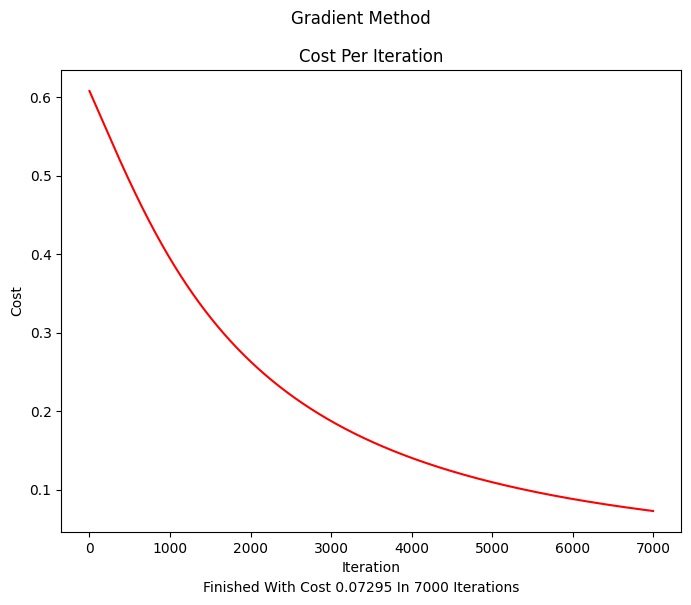

1 VS 2:
Train Cross Entropy: 0.51 | Test Cross Entropy: 0.52
Train Accuracy: 75.13 | Test Accuracy: 73.69



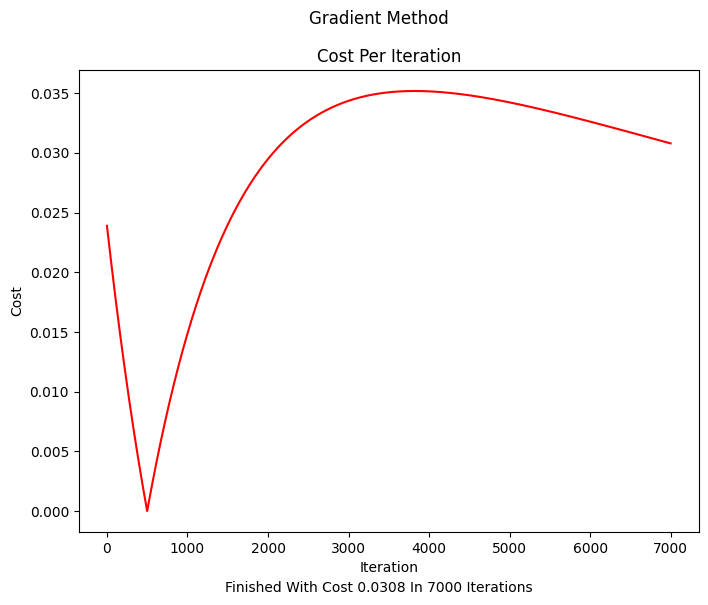

1 VS 3:
Train Cross Entropy: 0.44 | Test Cross Entropy: 0.45
Train Accuracy: 79.11 | Test Accuracy: 78.09



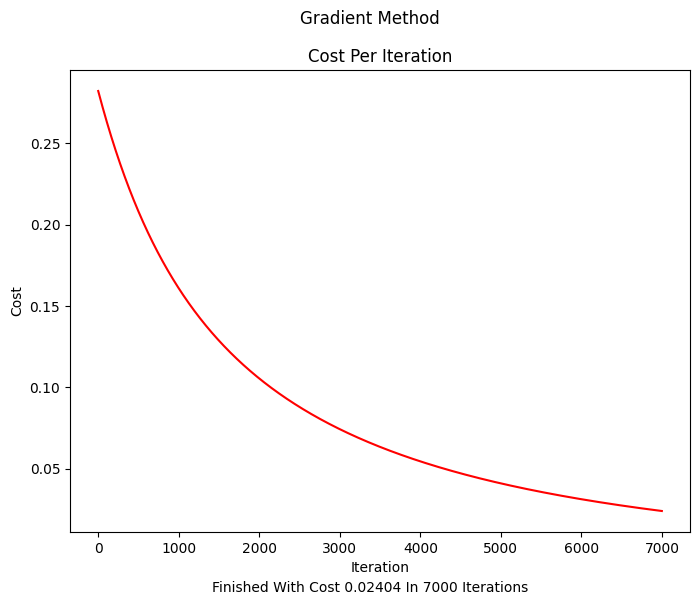

2 VS 3:
Train Cross Entropy: 0.35 | Test Cross Entropy: 0.35
Train Accuracy: 87.68 | Test Accuracy: 88.02



ValueError: x and y must have same first dimension, but have shapes (5000,) and (7000, 1)

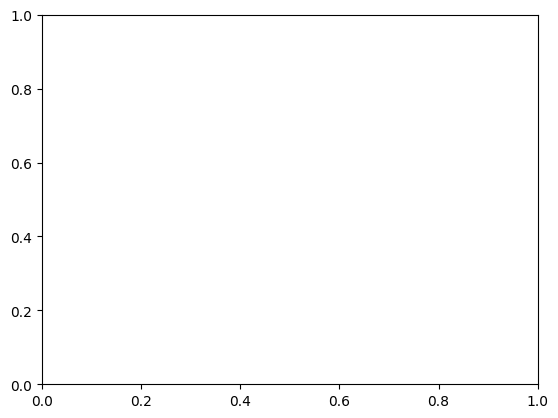

In [52]:
from sklearn.model_selection import train_test_split

# Preparing Data For One VS One Method
X_1v2 = X_new[np.where(y != 3)]
X_1v3 = X_new[np.where(y != 2)]
X_2v3 = X_new[np.where(y != 1)]

y_1v2 = y[y != 3]
y_1v3 = y[y != 2]
y_2v3 = y[y != 1]

y_1v2 = np.array([0 if y == 1 else 1 for y in y_1v2]).reshape(-1, 1)
y_1v3 = np.array([0 if y == 1 else 1 for y in y_1v3]).reshape(-1, 1)
y_2v3 = np.array([0 if y == 2 else 1 for y in y_2v3]).reshape(-1, 1)

X_train_1v2, X_test_1v2, y_train_1v2, y_test_1v2 = train_test_split(X_1v2, y_1v2, test_size=0.2, random_state=42)
X_train_1v3, X_test_1v3, y_train_1v3, y_test_1v3 = train_test_split(X_1v3, y_1v3, test_size=0.2, random_state=42)
X_train_2v3, X_test_2v3, y_train_2v3, y_test_2v3 = train_test_split(X_2v3, y_2v3, test_size=0.2, random_state=42)

# Train Phase Of 1 VS 2
theta_1v2, cost_1v2 = logistic_gradient(X_train_1v2, y_train_1v2, 0.1, 10000)

# Test Phase Of 1 VS 2
yh_train_1v2 = logistic_prediction(X_train_1v2, theta_1v2, norm=True)
yh_test_1v2 = logistic_prediction(X_test_1v2, theta_1v2, norm=True)

train_ce_1v2 = calc_cross_entropy(X_train_1v2, y_train_1v2, theta_1v2)
test_ce_1v2 = calc_cross_entropy(X_test_1v2, y_test_1v2, theta_1v2)

train_acc_1v2 = calc_accuracy(y_train_1v2, yh_train_1v2)
test_acc_1v2 = calc_accuracy(y_test_1v2, yh_test_1v2)

# Results For 1 VS 2
print('1 VS 2:')
print(f'Train Cross Entropy: {train_ce_1v2.round(2)} | Test Cross Entropy: {test_ce_1v2.round(2)}')
print(f'Train Accuracy: {round(train_acc_1v2 * 100, 2)} | Test Accuracy: {round(test_acc_1v2 * 100, 2)}\n')

# Train Phase Of 1 VS 3
theta_1v3, cost_1v3 = logistic_gradient(X_train_1v3, y_train_1v3, 0.1, 10000)

# Test Phase Of 1 VS 3
yh_train_1v3 = logistic_prediction(X_train_1v3, theta_1v3, norm=True)
yh_test_1v3 = logistic_prediction(X_test_1v3, theta_1v3, norm=True)

train_ce_1v3 = calc_cross_entropy(X_train_1v3, y_train_1v3, theta_1v3)
test_ce_1v3 = calc_cross_entropy(X_test_1v3, y_test_1v3, theta_1v3)

train_acc_1v3 = calc_accuracy(y_train_1v3, yh_train_1v3)
test_acc_1v3 = calc_accuracy(y_test_1v3, yh_test_1v3)

# Results For 1 VS 3
print('1 VS 3:')
print(f'Train Cross Entropy: {train_ce_1v3.round(2)} | Test Cross Entropy: {test_ce_1v3.round(2)}')
print(f'Train Accuracy: {round(train_acc_1v3 * 100, 2)} | Test Accuracy: {round(test_acc_1v3 * 100, 2)}\n')

# Train Phase Of 2 VS 3
theta_2v3, cost_2v3 = logistic_gradient(X_train_2v3, y_train_2v3, 0.1, 10000)

# Test Phase Of 2 VS 3
yh_train_2v3 = logistic_prediction(X_train_2v3, theta_2v3, norm=True)
yh_test_2v3 = logistic_prediction(X_test_2v3, theta_2v3, norm=True)

train_ce_2v3 = calc_cross_entropy(X_train_2v3, y_train_2v3, theta_2v3)
test_ce_2v3 = calc_cross_entropy(X_test_2v3, y_test_2v3, theta_2v3)

train_acc_2v3 = calc_accuracy(y_train_2v3, yh_train_2v3)
test_acc_2v3 = calc_accuracy(y_test_2v3, yh_test_2v3)

# Results For 2 VS 3
print('2 VS 3:')
print(f'Train Cross Entropy: {train_ce_2v3.round(2)} | Test Cross Entropy: {test_ce_2v3.round(2)}')
print(f'Train Accuracy: {round(train_acc_2v3 * 100, 2)} | Test Accuracy: {round(test_acc_2v3 * 100, 2)}\n')

In [ ]:
# from sklearn.model_selection import train_test_split

# # Preparing Data For One VS All Method
# X_OvA = data.iloc[:, :-1]

# y_1vA = np.array([1 if label == 1 else 0 for label in data.y]).reshape(-1, 1)
# y_2vA = np.array([1 if label == 2 else 0 for label in data.y]).reshape(-1, 1)
# y_3vA = np.array([1 if label == 3 else 0 for label in data.y]).reshape(-1, 1)

# X_train_1vA, X_test_1vA, y_train_1vA, y_test_1vA = train_test_split(X_OvA, y_1vA, test_size=0.2)
# X_train_2vA, X_test_2vA, y_train_2vA, y_test_2vA = train_test_split(X_OvA, y_2vA, test_size=0.2)
# X_train_3vA, X_test_3vA, y_train_3vA, y_test_3vA = train_test_split(X_OvA, y_3vA, test_size=0.2)

# # Train Phase Of 1 VS All
# theta_1vA, cost_1vA = logistic_gradient(X_train_1vA, y_train_1vA, 0.5, 10000)

# # Test Phase Of 1 VS All
# yh_train_1vA = logistic_prediction(X_train_1vA, theta_1vA, 1 / 3, True)
# yh_test_1vA = logistic_prediction(X_test_1vA, theta_1vA, 1 / 3, True)

# train_ce_1vA = calc_cross_entropy(X_train_1vA, y_train_1vA, theta_1vA)
# test_ce_1vA = calc_cross_entropy(X_test_1vA, y_test_1vA, theta_1vA)

# train_acc_1vA = calc_accuracy(y_train_1vA, yh_train_1vA)
# test_acc_1vA = calc_accuracy(y_test_1vA, yh_test_1vA)

# # Results For 1 VS All
# print('1 VS All:')
# print(f'Train Cross Entropy: {train_ce_1vA.round(2)} | Test Cross Entropy: {test_ce_1vA.round(2)}')
# print(f'Train Accuracy: {round(train_acc_1vA * 100, 2)} | Test Accuracy: {round(test_acc_1vA * 100, 2)}\n')

# # Train Phase Of 2 VS All
# theta_2vA, cost_2vA = logistic_gradient(X_train_2vA, y_train_2vA, 0.5, 10000)

# # Test Phase Of 2 VS All
# yh_train_2vA = logistic_prediction(X_train_2vA, theta_2vA, 1 / 3, True)
# yh_test_2vA = logistic_prediction(X_test_2vA, theta_2vA, 1 / 3, True)

# train_ce_2vA = calc_cross_entropy(X_train_2vA, y_train_2vA, theta_2vA)
# test_ce_2vA = calc_cross_entropy(X_test_2vA, y_test_2vA, theta_2vA)

# train_acc_2vA = calc_accuracy(y_train_2vA, yh_train_2vA)
# test_acc_2vA = calc_accuracy(y_test_2vA, yh_test_2vA)

# # Results For 2 VS All
# print('2 VS All:')
# print(f'Train Cross Entropy: {train_ce_2vA.round(2)} | Test Cross Entropy: {test_ce_2vA.round(2)}')
# print(f'Train Accuracy: {round(train_acc_2vA * 100, 2)} | Test Accuracy: {round(test_acc_2vA * 100, 2)}\n')

# # Train Phase Of 3 VS All
# theta_3vA, cost_3vA = logistic_gradient(X_train_3vA, y_train_3vA, 0.5, 10000)

# # Test Phase Of 2 VS All
# yh_train_3vA = logistic_prediction(X_train_3vA, theta_3vA, 1 / 3, True)
# yh_test_3vA = logistic_prediction(X_test_3vA, theta_3vA, 1 / 3, True)

# train_ce_3vA = calc_cross_entropy(X_train_3vA, y_train_3vA, theta_3vA)
# test_ce_3vA = calc_cross_entropy(X_test_3vA, y_test_3vA, theta_3vA)

# train_acc_3vA = calc_accuracy(y_train_3vA, yh_train_3vA)
# test_acc_3vA = calc_accuracy(y_test_3vA, yh_test_3vA)

# # Results For 3 VS All
# print('3 VS All:')
# print(f'Train Cross Entropy: {train_ce_3vA.round(2)} | Test Cross Entropy: {test_ce_3vA.round(2)}')
# print(f'Train Accuracy: {round(train_acc_3vA * 100, 2)} | Test Accuracy: {round(test_acc_3vA * 100, 2)}\n')

In [53]:
# Softmax
def one_hot_encode(y):
    m_sample = len(y)
    classes = np.unique(y)
    c_class = len(classes)
    one_hot = np.zeros((m_sample, c_class), int)
    for i in range(m_sample):
        for j, c in enumerate(classes):
            if y[i] == c:
                one_hot[i][j] = 1
    return one_hot


def softmax_prediction(X, theta, norm=False):
    z = np.dot(X, theta)
    h = np.exp(z - np.max(z, axis=1, keepdims=True))
    yh = h / np.sum(h, axis=1, keepdims=True)
    if not norm:
        return yh
    else:
        return np.argmax(yh, axis=1, keepdims=True) + 1


def softmax_gradient(X, y, alpha, n_iter):
    m_sample, n_feature = X.shape
    c_class = len(np.unique(y))
    theta = np.random.rand(n_feature, c_class)
    one_hot = one_hot_encode(np.array(y))
    iter_cost = []
    for i in range(n_iter):
        pred = softmax_prediction(X, theta)
        change = np.dot(X.T, (pred - one_hot))
        theta = theta - alpha * np.array(change)
        cost = 0
        for c in range(c_class):
            cost += np.sum(one_hot[:, c] * np.log10(pred[:, c]))
        cost = -cost / m_sample
        iter_cost.append(cost)
    iter_list = [num for num in range(len(iter_cost))]
    plt.figure(figsize=(8, 6))
    plt.plot(iter_list, iter_cost, color='red')
    plt.suptitle('Gradient Method')
    plt.title('Cost Per Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.figtext(0.5, 0.01, f'Finished With Cost {iter_cost[-1].round(5)} In {i + 1} Iterations', ha='center')
    plt.show()
    return theta, iter_cost[-1].round(2)

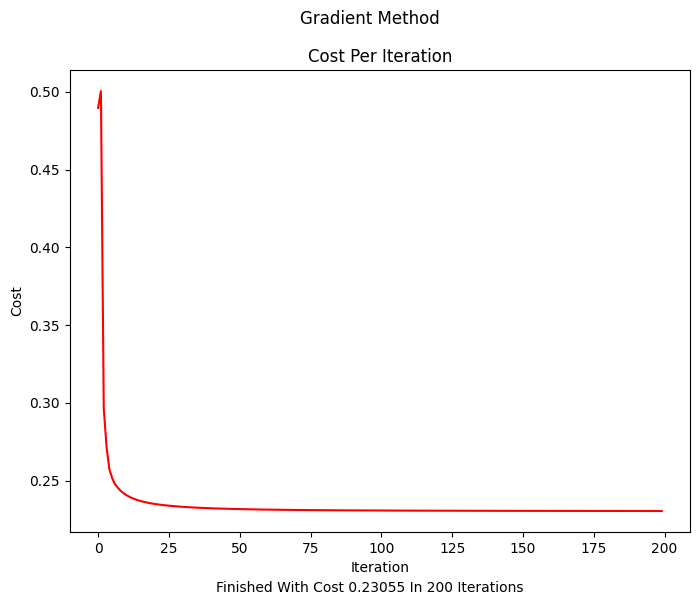

Softmax Regression Result:
Cross Entropy: 0.23
Train Accuracy: 78.98 | Test Accuracy: 78.41



In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train
class_theta, cross_entropy = softmax_gradient(X_train, y_train, 0.01, 200)

# Test
yh_train = softmax_prediction(X_train, class_theta, True)
yh_test = softmax_prediction(X_test, class_theta, True)

acc_train = calc_accuracy(np.array(y_train).reshape(-1, 1), yh_train)
acc_test = calc_accuracy(np.array(y_test).reshape(-1, 1), yh_test)

# Results
print('Softmax Regression Result:')
print(f'Cross Entropy: {cross_entropy}')
print(f'Train Accuracy: {round(acc_train * 100, 2)} | Test Accuracy: {round(acc_test * 100, 2)}\n')

In [108]:
# NB
def class_probability(label):
    m_sample = len(label)
    _, count = np.unique(label, return_counts=True)
    class_prob = count / m_sample
    for i in range(len(class_prob)):
        class_prob[i] = - math.log(class_prob[i], 0.5)
    return class_prob


def index_probability(data, label):
    unique, count = np.unique(label, return_counts=True)
    c_class = len(unique)
    m_sample = len(label)
    n_feature = 300
    index_prob = np.zeros(n_feature, c_class)
    for m in range(m_sample):
        for i in range(300):
            if data[m][i] == 0:
                index_prob[28 * i + j][label[m]][0] += 1
            elif data[m][i] == 1:
                index_prob[28 * i + j][label[m]][1] += 1
    for n in range(n_feature):
        for c in range(c_class):
            for v in range(2):
                index_prob[n][c][v] = (- math.log(index_prob[n][c][v], 0.5)) / (count[c])
    return index_prob


def naive_bayes_prediction(data, c_prob, i_prob):
    c_class = len(c_prob)
    m_sample = len(data)
    data_pred = np.zeros((m_sample, 1), int)
    for i, d in enumerate(data):
        pred_arr = c_prob.copy()
        for j in range(28):
            for k in range(28):
                for m in range(c_class):
                    if d[j][k] == 0:
                        pred_arr[m] += i_prob[28 * j + k][m][0]
                    elif d[j][k] == 1:
                        pred_arr[m] += i_prob[28 * j + k][m][1]
        data_pred[i][0] = np.argmax(pred_arr)
    return data_pred